# Monte Carlo Method
## Single Parameter

In [1]:
import numpy as np

def compute_err(U, U_exact):
    n = len(U)
    err_inf = 0
    err_sq = 0
    for i in range(0,n):
        for j in range(0,n):
            err_sq += np.absolute(U_exact[i][j] - U[i][j])**2
            if np.absolute(U_exact[i][j] - U[i][j]) > err_inf:
                err_inf = np.absolute(U_exact[i][j] - U[i][j])
        
    err_sq = (err_sq * h**2)**0.5
    return err_inf, err_sq

def sim_trans(T, F):
    n = len(T)
    start_time = time.time()
    eigvals, eigvecs = np.linalg.eig(T) #Get eigenvalues and eigenvectors of T
    eig_time = time.time() - start_time
    diag = diags(eigvals, 0, shape=(n, n)).toarray() #Set eigenvalues as diagonal matrix
    P = eigvecs #Set basis matrix P, with columns as the eigenvectors
    P_inv = np.linalg.inv(P)
    inv_time = time.time() - eig_time - start_time
    F_hat = np.matmul(np.matmul(P_inv,F),P) #F_hat = P^-1 * F * P
    U_hat = np.empty([n,n]) #u_hat(i,j) = f(i,j) / eigval(i) + eigval(j)
    for i in range(0,n):
        for j in range(0,n):
            if (eigvals[i]!=0 or eigvals[j]!=0):
                U_hat[i][j] = F_hat[i][j] / (eigvals[i]+eigvals[j])
            else:
                U_hat[i][j] = 0
    U = np.matmul(np.matmul(P,U_hat),P_inv) #U = P * U^hat * P^-1
    end_time = time.time()
    solve_time = end_time - inv_time - eig_time - start_time
    total_time = end_time - start_time
    timings = [eig_time, inv_time, solve_time, total_time]
    return U, timings

def sim_trans_explicit(T, F):
    start_time = time.time()
    eigvals = np.empty(n)
    eigvecs = np.empty([n,n])
    i = np.linspace(0,n-1,n)
    j = np.linspace(0,n-1,n)
    I, J = np.meshgrid(i, j, indexing='ij')
    eigvals = (T[0][0] - T[0][0]*np.cos((i+1)*np.pi/(n+1)))
    eigvecs = np.sqrt(2/(n+1))*np.sin(((I+1)*(J+1)*np.pi)/(n+1))
    eig_time = time.time() - start_time
    diag = diags(eigvals, 0, shape=(n, n)).toarray() #Set eigenvalues as diagonal matrix
    P = eigvecs #Set basis matrix P, with columns as the eigenvectors
    P_trans = P.transpose()
    diag_time = time.time() - eig_time - start_time
    #F_hat = np.matmul(np.matmul(np.linalg.inv(P),F),P) #F_hat = P^-1 * F * P
    F_hat = np.matmul(np.matmul(P_trans,F),P) #F_hat = P^-1 * F * P
    F_time = time.time() - diag_time - eig_time - start_time

    U_hat = np.empty([n,n]) #u_hat(i,j) = f(i,j) / eigval(i) + eigval(j)
    for i in range(0,n):
        for j in range(0,n):
            if (eigvals[i]!=0 or eigvals[j]!=0):
                U_hat[i][j] = F_hat[i][j] / (eigvals[i]+eigvals[j])
            else:
                U_hat[i][j] = 0

    U_time = time.time() - F_time - diag_time - eig_time - start_time
    #U = np.matmul(np.matmul(P,U_hat),np.linalg.inv(P)) #U = P * U^hat * P^-1
    U = np.matmul(np.matmul(P,U_hat),P_trans) #U = P * U^hat * P^-1
    end_time = time.time()
    solve_time = end_time - U_time - F_time - diag_time - eig_time - start_time
    total_time = end_time - start_time
    timings = [eig_time, diag_time, F_time, U_time, solve_time, total_time]
    return U, timings

In [2]:
#Define parameters
n = 50
h = 1/(n+1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

#Define tridiagonal matrix T
diagonals = [[-2],[1],[1]]


#Compute exact solution for comparison
U_exact = np.sin(np.pi*X) * np.sin(np.pi*Y) + 2*np.sin(3*np.pi*X)*np.sin(5*np.pi*Y)

random.seed(0)

def monteCarlo(M):

    #Define mean, variance and solutions as zero matrices
    mean_sol = np.zeros([n,n])
    #var_sol = np.zeros([n,n])
    
    
    #sols = np.zeros([M,n,n])
        
    for i in range(0, M): 
        eps = random.uniform(1, 3) #Generate random eps in range(r1,r2)
        T = np.multiply((-eps)/(h**2), diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())
        F = (2*(np.pi**2)*eps*np.sin(np.pi*X)*np.sin(np.pi*Y))+(34*(np.pi**2)*(eps**2)*np.sin(3*np.pi*X)*np.sin(5*np.pi*Y))
        U = sim_trans(T,F)[0]
        #sols[i] = U
        mean_sol += U
        
    mean_sol = mean_sol/M #Divide by number of samples to get the mean solution
#     plot_sol(X,Y,mean_sol)
    
#     #Calculate variance
#     for i in range(0, M):
#         var_sol += ((sols[i] - mean_sol)**2)
#         var_sol = var_sol/(M-1)
        
    err_inf, err_sq = compute_err(mean_sol, U_exact)
    print(err_inf, err_sq)
    

monteCarlo(1)
monteCarlo(10)
monteCarlo(100)
monteCarlo(1000)








NameError: name 'random' is not defined

## Multiple Parameters

In [21]:
import random
from scipy.sparse import diags
import random
import time
import sys

#Define parameters
n = 10
h = 1/(n+1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

#Define tridiagonal matrix T
diagonals = [[-2],[1],[1]]

#Compute exact solution for comparison
U_exact = np.sin(np.pi*X) * np.sin(np.pi*Y)

def monteCarlo(M,N,seed):
    
    random.seed(seed)
    
    #Define mean, variance and solutions as zero matrices
    mean_sol = np.zeros([n,n])
        
    for m in range(0, M):
        T = np.multiply((-1)/(h**2), diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())
        F = 2*(np.pi**2)*np.sin(np.pi*X)*np.sin(np.pi*Y)
        #eps0 = random.uniform(-1,1)
        eps = np.zeros([N,N])
        for p in range(0,N):
            for q in range(0,N):
                lower = -2**(-np.sqrt(p**2 + q**2))
                upper = 2**(-np.sqrt(p**2 + q**2))
                eps[p][q] = random.uniform(lower,upper)
        for i in range(0,n):
            for j in range(0,n):
                sum1 = 0
                sum2 = 1
                for p in range(1,N+1):
                    for q in range(1,N+1):
                        sum1 += eps[p-1][q-1]*(p**2 + q**2)*np.sin(p*np.pi*X[i][j])*np.sin(q*np.pi*Y[i][j])
                        sum2 += eps[p-1][q-1]*np.sin(p*np.pi*X[i][j])*np.sin(q*np.pi*Y[i][j])
                F[i][j] = (F[i][j] + sum1)*(sum2)
                T[i][j] = T[i][j]*sum2
        
        U = sim_trans_explicit(T, F)[0]
        mean_sol += U
        
    mean_sol = mean_sol/M #Divide by number of samples to get the mean solution
        
    err_inf, err_sq = compute_err(mean_sol, U_exact)        
    return mean_sol, err_inf, err_sq

    

0.05088119161216248 0.01949669337625289


### For SSH

In [9]:
import numpy as np
from scipy.sparse import diags
import random
import time
import sys

#Define parameters
n = int(sys.argv[1])
h = 1/(n+1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

#Define tridiagonal matrix T
diagonals = [[-2],[1],[1]]

#Compute exact solution for comparison
U_expected = np.sin(np.pi*X) * np.sin(np.pi*Y) 

def compute_err(U, U_exact):
    n = len(U)
    err_inf = 0
    err_sq = 0
    for i in range(0,n):
        for j in range(0,n):
            err_sq += np.absolute(U_exact[i][j] - U[i][j])**2
            if np.absolute(U_exact[i][j] - U[i][j]) > err_inf:
                err_inf = np.absolute(U_exact[i][j] - U[i][j])
        
    err_sq = (err_sq * h**2)**0.5
    return err_inf, err_sq

def sim_trans_explicit(T, F):
    start_time = time.time()
    eigvals = np.empty(n)
    eigvecs = np.empty([n,n])
    i = np.linspace(0,n-1,n)
    j = np.linspace(0,n-1,n)
    I, J = np.meshgrid(i, j, indexing='ij')
    eigvals = (T[0][0] - T[0][0]*np.cos((i+1)*np.pi/(n+1)))
    eigvecs = np.sqrt(2/(n+1))*np.sin(((I+1)*(J+1)*np.pi)/(n+1))
    eig_time = time.time() - start_time
    diag = diags(eigvals, 0, shape=(n, n)).toarray() #Set eigenvalues as diagonal matrix
    P = eigvecs #Set basis matrix P, with columns as the eigenvectors
    P_trans = P.transpose()
    diag_time = time.time() - eig_time - start_time
    #F_hat = np.matmul(np.matmul(np.linalg.inv(P),F),P) #F_hat = P^-1 * F * P
    F_hat = np.matmul(np.matmul(P_trans,F),P) #F_hat = P^-1 * F * P
    F_time = time.time() - diag_time - eig_time - start_time

    U_hat = np.empty([n,n]) #u_hat(i,j) = f(i,j) / eigval(i) + eigval(j)
    for i in range(0,n):
        for j in range(0,n):
            if (eigvals[i]!=0 or eigvals[j]!=0):
                U_hat[i][j] = F_hat[i][j] / (eigvals[i]+eigvals[j])
            else:
                U_hat[i][j] = 0

    U_time = time.time() - F_time - diag_time - eig_time - start_time
    #U = np.matmul(np.matmul(P,U_hat),np.linalg.inv(P)) #U = P * U^hat * P^-1
    U = np.matmul(np.matmul(P,U_hat),P_trans) #U = P * U^hat * P^-1
    end_time = time.time()
    solve_time = end_time - U_time - F_time - diag_time - eig_time - start_time
    total_time = end_time - start_time
    timings = [eig_time, diag_time, F_time, U_time, solve_time, total_time]
    return U, timings

def computeMatrices(N):
    T = np.multiply((-1)/(h**2), diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())
    F = 2*(np.pi**2)*np.sin(np.pi*X)*np.sin(np.pi*Y)
    eps = np.zeros([N,N])
    for p in range(0,N):
        for q in range(0,N):
            eps[p][q] = random.uniform(-1,1)
    for i in range(0,n):
        for j in range(0,n):
            sum1 = 0
            sum2 = 0
            for p in range(1,N+1):
                for q in range(1,N+1):
                    sum1 += (np.pi**2)*2**(-(p+q))*eps[p-1][q-1]*(p**2 + q**2)*np.sin(p*np.pi*X[i][j])*np.sin(q*np.pi*Y[i][j])
                    sum2 += 2**(-(p+q))*eps[p-1][q-1]*np.sin(p*np.pi*X[i][j])*np.sin(q*np.pi*Y[i][j])
            F[i][j] = (F[i][j] + sum1)*(sum2)
            T[i][j] = T[i][j]*sum2
    print(T, F)
    return T, F

def monteCarlo(M,N,seed):
    
    random.seed(seed)
    
    mean_sol = np.zeros([n,n])
    
    initial_time = time.time()
    
    total_compute_time = 0
    total_solve_time = 0
        
    for m in range(0, M):
        start_time = time.time()
        T, F = computeMatrices(N)
        compute_time = time.time() - start_time
        total_compute_time += compute_time
        U = sim_trans_explicit(T, F)[0]
        solve_time = time.time() - compute_time - start_time
        total_solve_time += solve_time
        mean_sol += U
        
    mean_sol = mean_sol/M #Divide by number of samples to get the mean solution
    
    total_time = time.time() - initial_time
        
    err_inf, err_sq = compute_err(mean_sol, U_expected)   
    return mean_sol, err_inf, err_sq, total_time, total_compute_time, total_solve_time


M = int(sys.argv[2])
N = int(sys.argv[3]) #Number of random variables = N^2

err_inf = 0
err_sq = 0
mean_time = 0
mean_c_time = 0
mean_s_time = 0

for i in range(0,10):
    U, e1, e2, t_time, c_time, s_time = monteCarlo(M,N,i)
    err_inf += e1
    err_sq += e2
    mean_time += t_time
    mean_c_time += c_time
    mean_s_time += s_time
    
err_inf /= 10
err_sq /= 10
mean_time /= 10
mean_c_time /= 10
mean_s_time /= 10

print('Total time:', mean_time, '\nErr inf', err_inf, '\nErr sq', err_sq)
print('Compute time:', mean_c_time, '\nSolve time', mean_s_time)


Total time: 0.38252255916595457 
Err inf 0.022035764301745808 
Err sq 0.010757790409409882
Compute time: 0.2956254482269287 
Solve time 0.08599295616149902


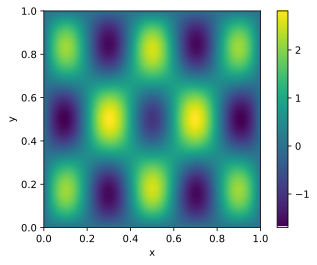

In [8]:
#Import necessary modules
import numpy as np
from scipy.sparse import diags, csr_matrix, kron
from scipy.linalg import solve_sylvester, schur, expm
from scipy.sparse.linalg import spsolve, cg
from scipy.integrate import quad
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import time
import random
%config InlineBackend.figure_format = 'svg'

def plot_sol(X,Y,U):
    plt.figure(0)
#     ax = plt.axes(projection='3d')
    xline = np.reshape(X, -1)
    yline = np.reshape(Y, -1)
    zline = np.reshape(U, -1)
#     plt.contourf(X, Y, U)
    plt.imshow(U, extent=[0,1,0,1], origin='lower')
    plt.colorbar()
    plt.axis(aspect='image')
    plt.xlabel('x')
    plt.ylabel('y')
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('u')
#     ax.plot3D(xline, yline, zline)

#Define parameters
n = 1000
h = 1/(n+1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')
U_exact = np.sin(np.pi*X) * np.sin(np.pi*Y) + 2*np.sin(3*np.pi*X)*np.sin(5*np.pi*Y)
plot_sol(X,Y,U_exact)
# plt.savefig('single.png')